# kNN to Predict the Age of Abalone

In [ ]:
import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/abalone/abalone.data"
      )
abalone = pd.read_csv(url, header=None)

In [4]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [6]:
abalone = abalone.drop("Sex", axis=1)

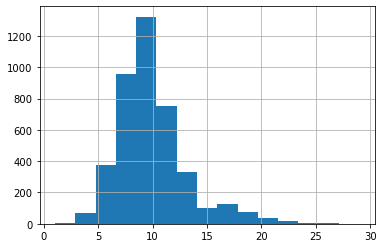

In [7]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [8]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

The histogram shows that most abalones in the dataset have between five and fifteen rings, but that it’s possible to get up to twenty-five rings. The older abalones are underrepresented in this dataset. This seems intuitive, as age distributions are generally skewed like this due to natural processes.

A second relevant exploration is to find out which of the variables, if any, have a strong correlation with the age. A strong correlation between an independent variable and your goal variable would be a good sign, as this would confirm that physical measurements and age are related.

You can observe the complete correlation matrix in correlation_matrix. The most important correlations are the ones with the target variable Rings. You can get those correlations like this:

Now look at the correlation coefficients for Rings with the other variables. The closer they are to 1, the more correlation there is.

You can conclude that there’s at least some correlation between physical measurements of adult abalones and their age, yet it’s also not very high. Very high correlations mean that you can expect a straightforward modeling process. In this case, you’ll have to try and see what results you can obtain using the kNN algorithm.

In [ ]:
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

## Find k Nearest Neighbors

Now that you have a way to compute the distance from any point to any point, you can use this to find the nearest neighbors of a point on which you want to make a prediction.

You need to find a number of neighbors, and that number is given by k. The minimum value of k is 1. This means using only one neighbor for the prediction. The maximum is the number of data points that you have. This means using all neighbors. The value of k is something that the user defines. Optimization tools can help you with this, as you’ll see in the last part of this tutorial.

Now, to find the nearest neighbors in NumPy, go back to the Abalone Dataset. As you’ve seen, you need to define distances on the vectors of the independent variables, so you should first get your pandas DataFrame into a NumPy array using the .values attribute:

In [12]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [13]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

The next step is to compute the distances between this new data point and each of the data points in the Abalone Dataset using the following code:

In [ ]:
distances = np.linalg.norm(X - new_data_point, axis=1)


You now have a vector of distances, and you need to find out which are the three closest neighbors. To do this, you need to find the IDs of the minimum distances. You can use a method called .argsort() to sort the array from lowest to highest, and you can take the first k elements to obtain the indices of the k nearest neighbors:


### Averaging Neighbors

In [ ]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

Having identified the indices of the three nearest neighbors of your abalone of unknown age, you now need to combine those neighbors into a prediction for your new data point.

As a first step, you need to find the ground truths for those three neighbors:



In [17]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10])

### Average for Regression

In regression problems, the target variable is numeric. You combine multiple neighbors into one prediction by taking the average of their values of the target variable. You can do this as follows:

In [18]:
prediction = nearest_neighbor_rings.mean()

You’ll get a value of 10 for prediction. This means that the 3-Nearest Neighbor prediction for your new data point is 10. You could do the same for any number of new abalones that you want.



### Mode for Classification

In classification problems, the target variable is categorical. As discussed before, you can’t take averages on categorical variables. For example, what would be the average of three predicted car brands? That would be impossible to say. You can’t apply an average on class predictions.

Instead, in the case of classification, you take the mode. The mode is the value that occurs most often. This means that you count the classes of all the neighbors, and you retain the most common class. The prediction is the value that occurs most often among the neighbors.

If there are multiple modes, there are multiple possible solutions. You could select a final winner randomly from the winners. You could also make the final decision based on the distances of the neighbors, in which case the mode of the closest neighbors would be retained.

You can compute the mode using the SciPy mode() function. As the abalone example is not a case of classification, the following code shows how you can compute the mode for a toy example:

In [19]:
import scipy.stats
class_neighbors = np.array(["A", "B", "B", "C"])
scipy.stats.mode(class_neighbors)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

As you can see, the mode in this example is "B" because it’s the value that occurs most often in the input data.

## Fit kNN in Python Using scikit-learn

While coding an algorithm from scratch is great for learning purposes, it’s usually not very practical when working on a machine learning task. In this section, you’ll explore the implementation of the kNN algorithm used in scikit-learn, one of the most comprehensive machine learning packages in Python.

### Splitting Data into Training and Test Sets for Model Evaluation

In this section, you’ll evaluate the quality of your abalone kNN model. In the previous sections, you had a technical focus, but you’re now going to have a more pragmatic and results-oriented point of view.

There are multiple ways of evaluating models, but the most common one is the train-test split. When using a train-test split for model evaluation, you split the dataset into two parts:

Training data is used to fit the model. For kNN, this means that the training data will be used as neighbors.
Test data is used to evaluate the model. It means that you’ll make predictions for the number of rings of each of the abalones in the test data and compare those results to the known true number of rings.
You can split the data into training and test sets in Python using scikit-learn’s built-in train_test_split():

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

The test_size refers to the number of observations that you want to put in the training data and the test data. If you specify a test_size of 0.2, your test_size will be 20 percent of the original data, therefore leaving the other 80 percent as training data.

The random_state is a parameter that allows you to obtain the same results every time the code is run. train_test_split() makes a random split in the data, which is problematic for reproducing the results. Therefore, it’s common to use random_state. The choice of value in random_state is arbitrary.

In the above code, you separate the data into training and test data. This is needed for objective model evaluation. You can now proceed to fit a kNN model on the training data using scikit-learn.

### Fitting kNN Regression in scikit-learn to the Abalone Dataset

To fit a model from scikit-learn, you start by creating a model of the correct class. At this point, you also need to choose the values for your hyperparameters. For the kNN algorithm, you need to choose the value for k, which is called n_neighbors in the scikit-learn implementation. Here’s how you can do this in Python:

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

You create an unfitted model with knn_model. This model will use the three nearest neighbors to predict the value of a future data point. To get the data into the model, you can then fit the model on the training dataset:

In [22]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Using .fit(), you let the model learn from the data. At this point, knn_model contains everything that’s needed to make predictions on new abalone data points. That’s all the code you need for fitting a kNN regression using Python!

### Using scikit-learn to Inspect Model Fit

Fitting a model, however, isn’t enough. In this section, you’ll look at some functions that you can use to evaluate the fit.

There are many evaluation metrics available for regression, but you’ll use one of the most common ones, the root-mean-square error (RMSE). The RMSE of a prediction is computed as follows:

1. Compute the difference between each data point’s actual value and predicted value.
2. For each difference, take the square of this difference.
3. Sum all the squared differences.
4. Take the square root of the summed value.

To start, you can evaluate the prediction error on the training data. This means that you use the training data for prediction, so you know that the result should be relatively good. You can use the following code to obtain the RMSE:

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse


1.653705966446084

In this code, you compute the RMSE using the knn_model that you fitted in the previous code block. You compute the RMSE on the training data for now. For a more realistic result, you should evaluate the performances on data that aren’t included in the model. This is why you kept the test set separate for now. You can evaluate the predictive performances on the test set with the same function as before:

In [24]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

In this code block, you evaluate the error on data that wasn’t yet known by the model. This more-realistic RMSE is slightly higher than before. The RMSE measures the average error of the predicted age, so you can interpret this as having, on average, an error of 1.65 years. Whether an improvement from 2.37 years to 1.65 years is good is case specific. At least you’re getting closer to correctly estimating the age.

Until now, you’ve only used the scikit-learn kNN algorithm out of the box. You haven’t yet done any tuning of hyperparameters and a random choice for k. You can observe a relatively large difference between the RMSE on the training data and the RMSE on the test data. This means that the model suffers from overfitting on the training data: It does not generalize well.

This is nothing to worry about at this point. In the next part, you’ll see how to optimize the prediction error or test error using various tuning methods.

### Plotting Fit of the Model

A last thing to look at before starting to improve the model is the actual fit of your model. To understand what the model has learned, you can visualize how your predictions have been made using Matplotlib:

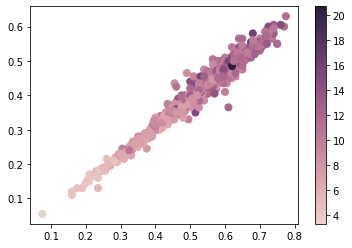

In [25]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In this code block, you use Seaborn to create a scatter plot of the first and second columns of X_test by subsetting the arrays X_test[:,0] and X_test[:,1]. Remember from before that the first two columns are Length and Diameter. They are strongly correlated, as you’ve seen in the correlations table.

You use c to specify that the predicted values (test_preds) should be used as a colorbar. The argument s is used to specify the size of the points in the scatter plot. You use cmap to specify the cubehelix_palette color map. To learn more about plotting with Matplotlib, check out Python Plotting With Matplotlib.

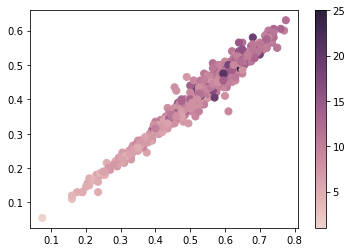

In [26]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

On this graph, each point is an abalone from the test set, with its actual length and actual diameter on the X- and Y-axis, respectively. The color of the point reflects the predicted age. You can see that the longer and larger an abalone is, the higher its predicted age. This is logical, and it’s a positive sign. It means that your model is learning something that seems correct.

This confirms that the trend your model is learning does indeed make sense.

You could extract a visualization for each combination of the seven independent variables. For this tutorial, that would be too long, but don’t hesitate to try it out. The only thing to change is the columns that are specified in the scatter.

These visualizations are two-dimensional views of a seven-dimensional dataset. If you play around with them, it will give you a great understanding of what the model is learning and, maybe, what it’s not learning or is learning wrong.

## Tune and Optimize kNN in Python Using scikit-learn

There are numerous ways you can improve your predictive score. Some improvements could be made by working on the input data using data wrangling, but in this tutorial, the focus is on the kNN algorithm. Next, you’ll look at ways to improve the algorithm part of the modeling pipeline.



### Improving kNN Performances in scikit-learn Using GridSearchCV

Until now, you’ve always worked with k=3 in the kNN algorithm, but the best value for k is something that you need to find empirically for each dataset.

When you use few neighbors, you have a prediction that will be much more variable than when you use more neighbors:

* If you use one neighbor only, the prediction can strongly change from one point to the other. When you think about your own neighbors, one may be quite different from the others. If you lived next to an outlier, your 1-NN prediction would be wrong.

* If you have multiple data points, the impact of one extremely different neighbor will be much less.

* If you use too many neighbors, the prediction of each point risks being very close. Let’s say that you use all neighbors for a prediction. In that case, every prediction would be the same.

To find the best value for k, you’re going to use a tool called GridSearchCV. This is a tool that is often used for tuning hyperparameters of machine learning models. In your case, it will help by automatically finding the best value of k for your dataset.

GridSearchCV is available in scikit-learn, and it has the benefit of being used in almost the exact same way as the scikit-learn models:

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

Here, you use GridSearchCV to fit the model. In short, GridSearchCV repeatedly fits kNN regressors on a part of the data and tests the performances on the remaining part of the data. Doing this repeatedly will yield a reliable estimate of the predictive performance of each of the values for k. In this example, you test the values from 1 to 50.

In the end, it will retain the best performing value of k, which you can access with .best_params_:

In [28]:
gridsearch.best_params_

{'n_neighbors': 25}

In this code, you print the parameters that have the lowest error score. With .best_params_, you can see that choosing 25 as value for k will yield the best predictive performance. Now that you know what the best value of k is, you can see how it affects your train and test performances:



In [29]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse


2.0731180327543384

In [30]:
test_rmse

2.1700197339962175

With this code, you fit the model on the training data and evaluate the test data. You can see that the training error is worse than before, but the test error is better than before. This means that your model fits less closely to the training data. Using GridSearchCV to find a value for k has reduced the problem of overfitting on the training data.



### Adding Weighted Average of Neighbors Based on Distance

Using GridSearchCV, you reduced the test RMSE from 2.37 to 2.17. In this section, you’ll see how to improve the performances even more.

Below, you’ll test whether the performance of your model will be any better when predicting using a weighted average instead of a regular average. This means that neighbors that are further away will less strongly influence the prediction.

You can do this by setting the weights hyperparameter to the value of "distance". However, setting this weighted average could have an impact on the optimal value of k. Therefore, you’ll again use GridSearchCV to tell you which type of averaging you should use:

In [31]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_
{'n_neighbors': 25, 'weights': 'distance'}
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1634265584947485

Here, you test whether it makes sense to use a different weighing using your GridSearchCV. Applying a weighted average rather than a regular average has reduced the prediction error from 2.17 to 2.1634. Although this isn’t a huge improvement, it’s still better, which makes it worth it.